In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from MSM_util import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import sys, scipy, numpy

# print(scipy.__version__, numpy.__version__, sys.version_info)

# Hyper parameters

# How much period taken into calculation and prediction
m = 20
# number of days prediction
RVn = 22
# kbar
kbar = 3
vary = "k"
kbar_start = 3
kbar_max = 7

xls_data = pd.read_excel('data_GVZ_GLD.xlsx')
date_GLD = xls_data.iloc[:,3]
GLD = xls_data.loc[:,'GLD']

GLD2 = GLD.shift(1)
GLD2[0] = GLD[0]
GLD_r = np.log(GLD/GLD2)

GLD_d = GLD_r - np.mean(GLD_r)
plt.plot(date_GLD,GLD)
plt.title('de-mean data')
plt.plot(date_GLD,200*GLD_r)

data = GLD_d[::-1]


startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 5]
op_methods = 'slsqp'

In [2]:
RV, m0, b, gamma_k, sigma = msm_vary_k_cal(data, vary, kbar_start, kbar_max, LB, UB, op_methods, startingvals, m, RVn)

=====kbar = 3
round0
round1
round2
round3
round4
round5
round6
round7
round8
round9
round10
round11
round12
round13
round14
round15
round16
round17
round18
round19
=====kbar = 4
round0
round1
round2
round3
round4
round5
round6
round7
round8
round9
round10
round11
round12
round13
round14
round15
round16
round17
round18
round19
=====kbar = 5
round0
round1
round2
round3
round4
round5
round6
round7
round8
round9
round10
round11
round12
round13
round14
round15
round16
round17
round18
round19
=====kbar = 6
round0
round1
round2
round3
round4
round5
round6
round7
round8
round9
round10
round11
round12
round13
round14
round15
round16
round17
round18
round19
180213MSM_vary_kbar7_RV22_m20.xlsx


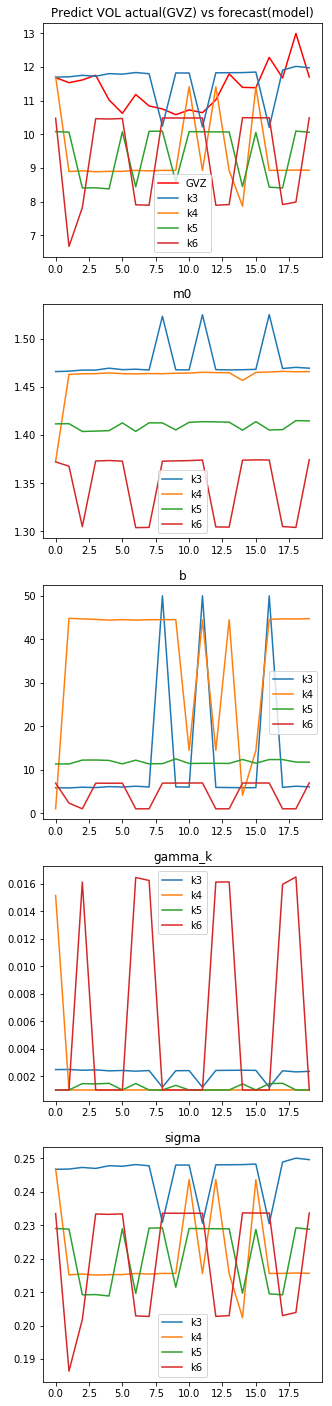

In [10]:
GVZ = xls_data.loc[:,"GVZ"]
GVZ = GVZ[::-1]
msm_vary_k_plot(GVZ, m, RV, m0, b, gamma_k, sigma)

In [4]:
GVZ.iloc[-m:]

19    11.68
18    11.53
17    11.61
16    11.75
15    11.02
14    10.62
13    11.18
12    10.84
11    10.75
10    10.58
9     10.72
8     10.64
7     11.02
6     11.79
5     11.39
4     11.38
3     12.28
2     11.67
1     12.99
0     11.70
Name: GVZ, dtype: float64

In [5]:
new_RV= RV
new_RV['GVZ'] = GVZ.iloc[-m:]
new_RV

,k3,k4,k5,k6,GVZ
0,11.694685,11.712899,10.077003,10.472449,11.70
1,11.702525,8.892906,10.060381,6.670126,12.99
2,11.747887,8.913019,8.406293,7.822650,11.67
3,11.720109,8.887066,8.411137,10.461142,12.28
4,11.797548,8.898355,8.377541,10.452187,11.38
5,11.781370,8.898889,10.070354,10.465916,11.39
6,11.830566,8.927009,8.438666,7.906650,11.79
7,11.794844,8.911741,10.086278,7.893331,11.02
8,10.240909,8.928276,10.091863,10.482819,10.64
9,11.817467,8.926577,8.588973,10.481377,10.72


In [6]:
GVZ_last = GVZ.iloc[-m:]

In [7]:
cols = RV.columns
vol_RV = df()
for col in cols.__iter__():
    vol_RV[col] = (RV[col] - GVZ_last)**2

In [8]:
vol_RV

,k3,k4,k5,k6,GVZ
0,0.000028,0.000166,2.634118,1.506881,0.0
1,1.657591,16.786178,8.582666,39.940803,0.0
2,0.006066,7.600943,10.651782,14.802104,0.0
3,0.313478,11.512002,14.968102,3.308246,0.0
4,0.174346,6.158560,9.014759,0.860837,0.0
5,0.153170,6.205636,1.741466,0.853931,0.0
6,0.001646,8.196715,11.231439,15.080409,0.0
7,0.600383,4.444755,0.871836,9.776058,0.0
8,0.159273,2.929999,0.300454,0.024706,0.0
9,1.204433,3.216367,4.541277,0.056941,0.0


In [9]:
vol_RV.sum()

k3      12.401128
k4     113.657970
k5      98.743449
k6     135.174859
GVZ      0.000000
dtype: float64